In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 1: Load the datasets
nifty_data = pd.read_csv('/content/Datasets/NIFTY50_all.csv')  # Stock price details
metadata = pd.read_csv('/content/Datasets/stock_metadata.csv')  # Stock symbols and industries
inr_data = pd.read_csv('/content/Datasets/USD_INR.csv')  # INR exchange rates

# Step 2: Convert date formats to YYYY-MM-DD (like before)
inr_data['Date'] = pd.to_datetime(inr_data['Date'], format='%d-%m-%Y')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format='%Y-%m-%d')


In [ ]:
  metadata = metadata[['Symbol', 'Industry']]
  nifty_data = nifty_data[['Date','Symbol' , 'High', 'Low', 'Open', 'Close', 'Last', 'VWAP', 'Prev Close' ]]

  # Step 4: Merge NIFTY50 stock price data with the industry metadata
  nifty_with_industry = pd.merge(nifty_data, metadata, left_on='Symbol', right_on='Symbol', how='left')

  # Step 5: Merge with INR exchange rate data on 'Date'
  nifty_merged = pd.merge(nifty_with_industry, inr_data[['Date', 'Price']], on='Date', how='left')


In [ ]:
def analyze_effects(data, industry):
    if data.empty:
        print(f"\nNo data for industry: {industry}")
        return

    print(f"\nAnalyzing industry: {industry}")

    # Drop rows with NaN values in 'price' and columns to analyze
    data = data[['Price'] + columns_to_analyze].dropna()

    # Check if there are enough rows left after dropping NaNs
    if len(data) < 2:
        print(f"Not enough data after removing NaNs for industry: {industry}")
        return

    # Calculate correlation matrix
    correlation_matrix = data.corr()
    print("Correlation matrix:")
    print(correlation_matrix['Price'])

    # Plot correlation heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation between Stock Data and INR Exchange Rate - {industry}')
    plt.show()

    # Linear regression analysis
    for col in columns_to_analyze:
        X = data[['Price']]
        y = data[[col]]

        # Check if there's enough data for regression
        if len(X) < 2 or len(y) < 2:
            print(f"Not enough data for {col} in {industry}")
            continue

        model = LinearRegression()
        model.fit(X, y)

        # Output the coefficient (slope)
        print(f"The effect of INR exchange rate on {col} in {industry}: {model.coef_[0][0]}")



No data for industry: nan

Analyzing industry: SERVICES
Correlation matrix:
Price         1.000000
High          0.129713
Low           0.214007
Open          0.089909
Close         0.202178
Last          0.245806
VWAP          0.141947
Prev Close    0.047735
Name: Price, dtype: float64


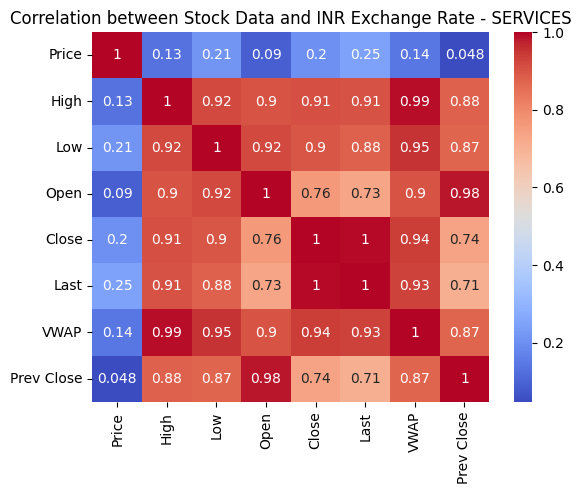

The effect of INR exchange rate on High in SERVICES: 9.114766826466088
The effect of INR exchange rate on Low in SERVICES: 15.918491155518172
The effect of INR exchange rate on Open in SERVICES: 7.074430634738274
The effect of INR exchange rate on Close in SERVICES: 14.211978541038944
The effect of INR exchange rate on Last in SERVICES: 16.850493707908825
The effect of INR exchange rate on VWAP in SERVICES: 10.12509602672824
The effect of INR exchange rate on Prev Close in SERVICES: 3.611149405880355

Analyzing industry: CONSUMER GOODS
Correlation matrix:
Price         1.000000
High         -0.000589
Low          -0.000390
Open         -0.002280
Close         0.001288
Last          0.001291
VWAP         -0.000039
Prev Close   -0.002542
Name: Price, dtype: float64


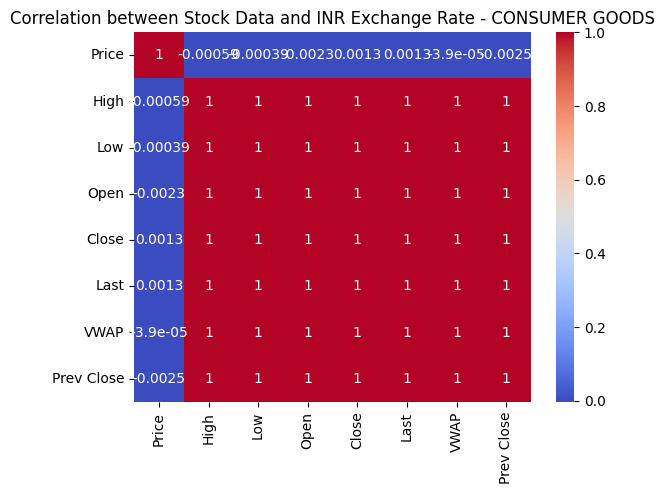

The effect of INR exchange rate on High in CONSUMER GOODS: -9.958605354013194
The effect of INR exchange rate on Low in CONSUMER GOODS: -6.4626295546466
The effect of INR exchange rate on Open in CONSUMER GOODS: -38.16982524859164
The effect of INR exchange rate on Close in CONSUMER GOODS: 21.59905584689377
The effect of INR exchange rate on Last in CONSUMER GOODS: 21.639187904469537
The effect of INR exchange rate on VWAP in CONSUMER GOODS: -0.6593110944650804
The effect of INR exchange rate on Prev Close in CONSUMER GOODS: -42.51460891027771

Analyzing industry: FINANCIAL SERVICES
Correlation matrix:
Price         1.000000
High          0.005926
Low           0.006621
Open          0.005129
Close         0.006370
Last          0.006756
VWAP          0.006456
Prev Close    0.003194
Name: Price, dtype: float64


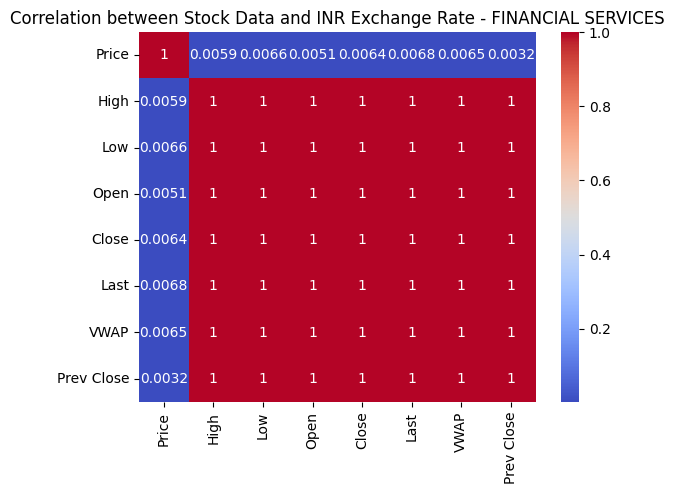

The effect of INR exchange rate on High in FINANCIAL SERVICES: 52.306097334156604
The effect of INR exchange rate on Low in FINANCIAL SERVICES: 56.84589109680405
The effect of INR exchange rate on Open in FINANCIAL SERVICES: 44.72518003122752
The effect of INR exchange rate on Close in FINANCIAL SERVICES: 55.35620761651125
The effect of INR exchange rate on Last in FINANCIAL SERVICES: 58.71712943300927
The effect of INR exchange rate on VWAP in FINANCIAL SERVICES: 56.1818338807636
The effect of INR exchange rate on Prev Close in FINANCIAL SERVICES: 27.77153443956185

Analyzing industry: AUTOMOBILE
Correlation matrix:
Price         1.000000
High          0.006480
Low           0.005344
Open          0.001596
Close         0.009496
Last          0.009821
VWAP          0.007259
Prev Close   -0.000233
Name: Price, dtype: float64


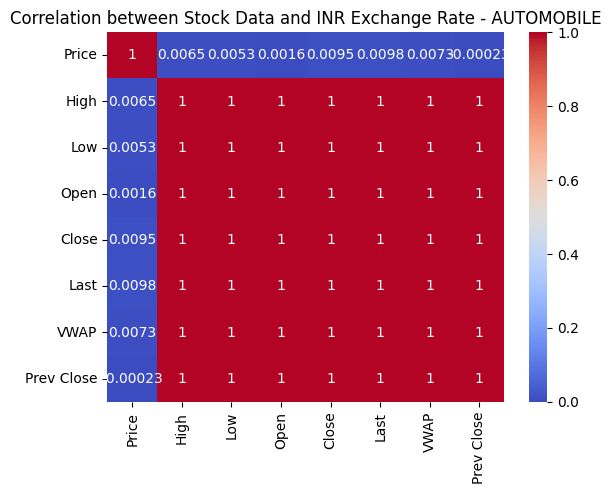

The effect of INR exchange rate on High in AUTOMOBILE: 43.849573676711735
The effect of INR exchange rate on Low in AUTOMOBILE: 35.39666992534178
The effect of INR exchange rate on Open in AUTOMOBILE: 10.711545184978043
The effect of INR exchange rate on Close in AUTOMOBILE: 63.52974457232066
The effect of INR exchange rate on Last in AUTOMOBILE: 65.70278656633923
The effect of INR exchange rate on VWAP in AUTOMOBILE: 48.55860437601605
The effect of INR exchange rate on Prev Close in AUTOMOBILE: -1.558700626740897

Analyzing industry: TELECOM
Correlation matrix:
Price         1.000000
High          0.465795
Low           0.162031
Open          0.503122
Close         0.250619
Last          0.258876
VWAP          0.259469
Prev Close    0.454718
Name: Price, dtype: float64


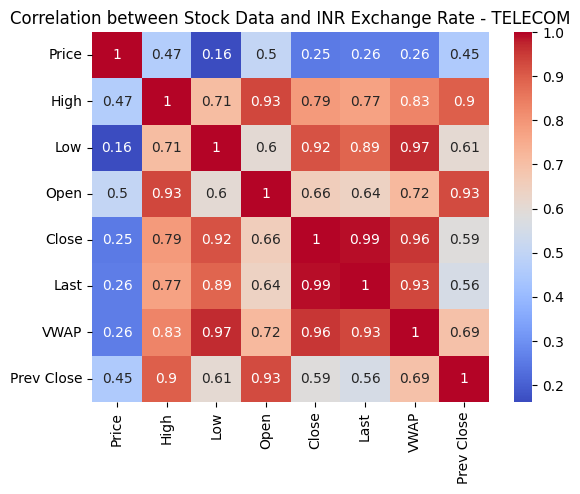

The effect of INR exchange rate on High in TELECOM: 11.950841240152853
The effect of INR exchange rate on Low in TELECOM: 4.216610967899313
The effect of INR exchange rate on Open in TELECOM: 14.650988459115824
The effect of INR exchange rate on Close in TELECOM: 6.117826287455259
The effect of INR exchange rate on Last in TELECOM: 6.568143919406749
The effect of INR exchange rate on VWAP in TELECOM: 5.967078333663946
The effect of INR exchange rate on Prev Close in TELECOM: 13.812734690872563

Analyzing industry: ENERGY
Correlation matrix:
Price         1.000000
High          0.005875
Low           0.006266
Open          0.003979
Close         0.006586
Last          0.007014
VWAP          0.006794
Prev Close    0.002287
Name: Price, dtype: float64


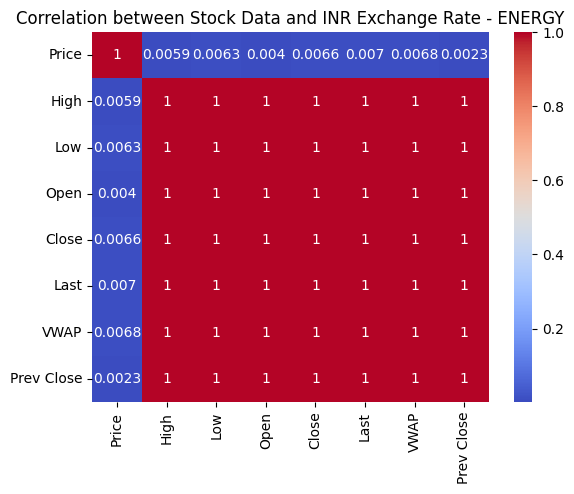

The effect of INR exchange rate on High in ENERGY: 12.231525591275213
The effect of INR exchange rate on Low in ENERGY: 12.678973013822675
The effect of INR exchange rate on Open in ENERGY: 8.186596752097138
The effect of INR exchange rate on Close in ENERGY: 13.513959234148988
The effect of INR exchange rate on Last in ENERGY: 14.387441405911655
The effect of INR exchange rate on VWAP in ENERGY: 13.941206305145888
The effect of INR exchange rate on Prev Close in ENERGY: 4.698446558061221

Analyzing industry: PHARMA
Correlation matrix:
Price         1.000000
High          0.010019
Low           0.013853
Open          0.011032
Close         0.011958
Last          0.011993
VWAP          0.011871
Prev Close    0.010272
Name: Price, dtype: float64


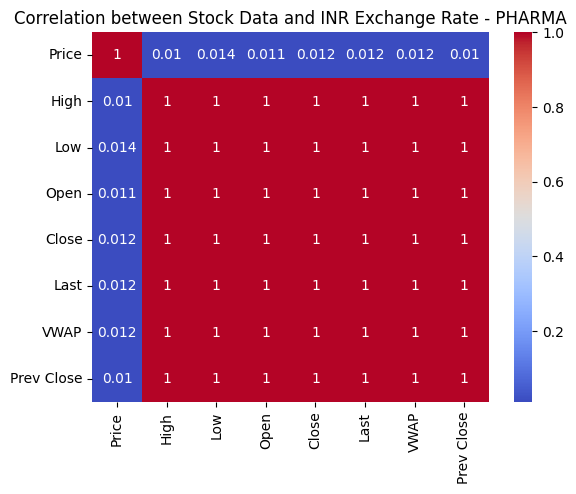

The effect of INR exchange rate on High in PHARMA: 53.67960541879722
The effect of INR exchange rate on Low in PHARMA: 72.46180928220839
The effect of INR exchange rate on Open in PHARMA: 58.56999196979202
The effect of INR exchange rate on Close in PHARMA: 63.369889474462006
The effect of INR exchange rate on Last in PHARMA: 63.55198072239788
The effect of INR exchange rate on VWAP in PHARMA: 62.851298368837035
The effect of INR exchange rate on Prev Close in PHARMA: 54.373986523744335

Analyzing industry: METALS
Correlation matrix:
Price         1.000000
High          0.009074
Low           0.012787
Open          0.007399
Close         0.009511
Last          0.009610
VWAP          0.012116
Prev Close    0.001873
Name: Price, dtype: float64


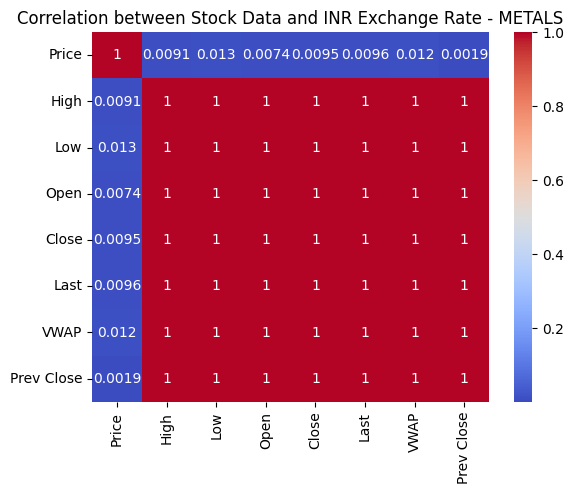

The effect of INR exchange rate on High in METALS: 5.7381258297979665
The effect of INR exchange rate on Low in METALS: 7.734654425420931
The effect of INR exchange rate on Open in METALS: 4.57207637964356
The effect of INR exchange rate on Close in METALS: 5.909608540795468
The effect of INR exchange rate on Last in METALS: 5.970439667788214
The effect of INR exchange rate on VWAP in METALS: 7.520389739812256
The effect of INR exchange rate on Prev Close in METALS: 1.1532483162121383

Analyzing industry: CEMENT & CEMENT PRODUCTS
Correlation matrix:
Price         1.000000
High          0.007038
Low           0.003899
Open          0.002937
Close         0.004324
Last          0.005740
VWAP          0.005834
Prev Close    0.002307
Name: Price, dtype: float64


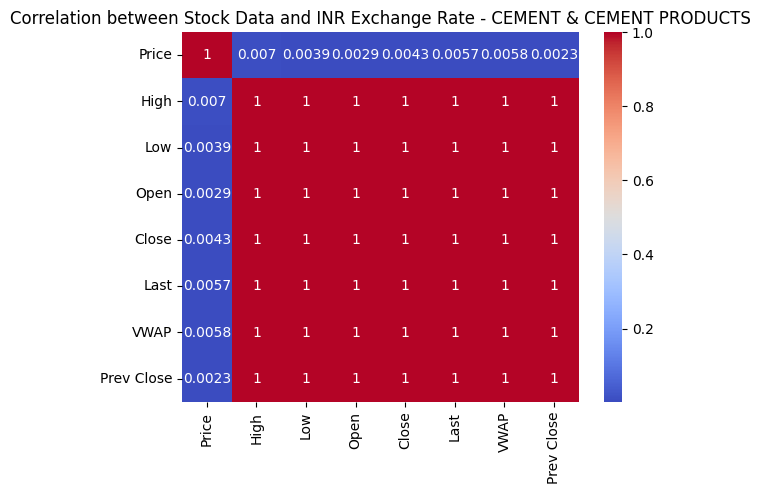

The effect of INR exchange rate on High in CEMENT & CEMENT PRODUCTS: 244.96197914089592
The effect of INR exchange rate on Low in CEMENT & CEMENT PRODUCTS: 131.36267109523206
The effect of INR exchange rate on Open in CEMENT & CEMENT PRODUCTS: 100.38746004600006
The effect of INR exchange rate on Close in CEMENT & CEMENT PRODUCTS: 148.10321755941345
The effect of INR exchange rate on Last in CEMENT & CEMENT PRODUCTS: 196.78225835183005
The effect of INR exchange rate on VWAP in CEMENT & CEMENT PRODUCTS: 199.8474119230676
The effect of INR exchange rate on Prev Close in CEMENT & CEMENT PRODUCTS: 78.63439810205152

Analyzing industry: IT
Correlation matrix:
Price         1.000000
High         -0.015014
Low          -0.015525
Open         -0.017758
Close        -0.013963
Last         -0.012739
VWAP         -0.015292
Prev Close   -0.021352
Name: Price, dtype: float64


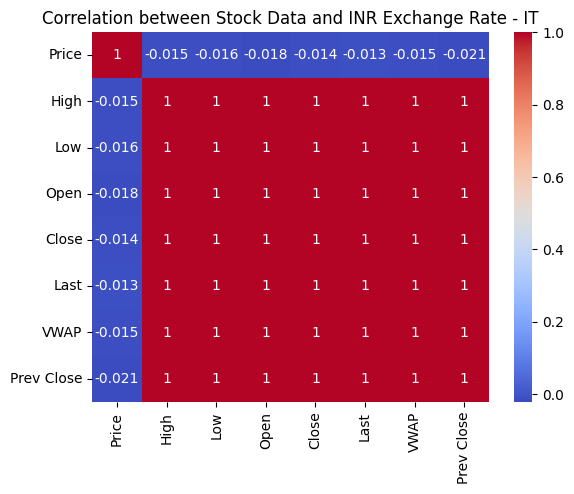

The effect of INR exchange rate on High in IT: -41.434924288887565
The effect of INR exchange rate on Low in IT: -41.85374433395616
The effect of INR exchange rate on Open in IT: -48.24055252351092
The effect of INR exchange rate on Close in IT: -38.092032854512794
The effect of INR exchange rate on Last in IT: -34.77905674713816
The effect of INR exchange rate on VWAP in IT: -41.75815998255655
The effect of INR exchange rate on Prev Close in IT: -57.9944152103239

Analyzing industry: CONSTRUCTION
Correlation matrix:
Price         1.000000
High          0.218920
Low           0.240210
Open          0.112011
Close         0.390650
Last          0.379980
VWAP          0.276730
Prev Close    0.054292
Name: Price, dtype: float64


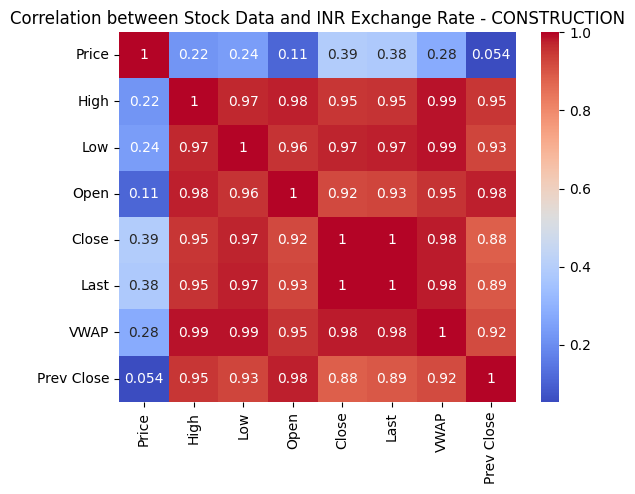

The effect of INR exchange rate on High in CONSTRUCTION: 33.47014740757668
The effect of INR exchange rate on Low in CONSTRUCTION: 32.80302418019311
The effect of INR exchange rate on Open in CONSTRUCTION: 16.66652011893768
The effect of INR exchange rate on Close in CONSTRUCTION: 56.343226565491925
The effect of INR exchange rate on Last in CONSTRUCTION: 53.58901918019707
The effect of INR exchange rate on VWAP in CONSTRUCTION: 41.11250592151532
The effect of INR exchange rate on Prev Close in CONSTRUCTION: 7.768347039114696

Analyzing industry: FERTILISERS & PESTICIDES
Correlation matrix:
Price         1.000000
High         -0.413786
Low          -0.571613
Open         -0.621651
Close        -0.257372
Last         -0.217772
VWAP         -0.506371
Prev Close   -0.713166
Name: Price, dtype: float64


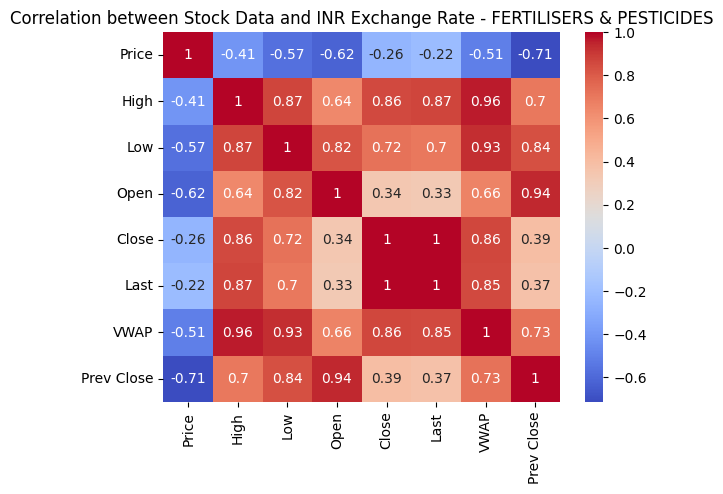

The effect of INR exchange rate on High in FERTILISERS & PESTICIDES: -15.84237821359808
The effect of INR exchange rate on Low in FERTILISERS & PESTICIDES: -24.170365971744907
The effect of INR exchange rate on Open in FERTILISERS & PESTICIDES: -28.89890612219309
The effect of INR exchange rate on Close in FERTILISERS & PESTICIDES: -11.585759715727221
The effect of INR exchange rate on Last in FERTILISERS & PESTICIDES: -9.60932213034422
The effect of INR exchange rate on VWAP in FERTILISERS & PESTICIDES: -20.60603469272222
The effect of INR exchange rate on Prev Close in FERTILISERS & PESTICIDES: -39.139697100878884

Analyzing industry: MEDIA & ENTERTAINMENT
Correlation matrix:
Price         1.000000
High          0.174317
Low           0.092591
Open          0.041601
Close         0.241041
Last          0.232549
VWAP          0.205245
Prev Close   -0.045654
Name: Price, dtype: float64


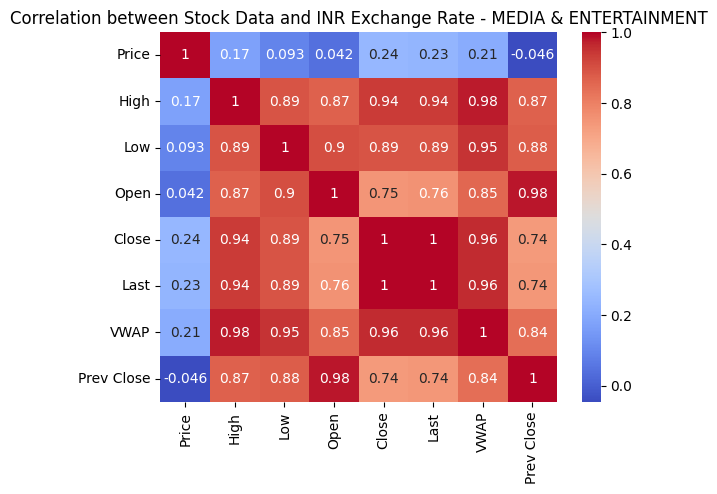

The effect of INR exchange rate on High in MEDIA & ENTERTAINMENT: 4.256536491887971
The effect of INR exchange rate on Low in MEDIA & ENTERTAINMENT: 2.1862886178702934
The effect of INR exchange rate on Open in MEDIA & ENTERTAINMENT: 0.980659435622103
The effect of INR exchange rate on Close in MEDIA & ENTERTAINMENT: 6.169763410005645
The effect of INR exchange rate on Last in MEDIA & ENTERTAINMENT: 5.783189484208845
The effect of INR exchange rate on VWAP in MEDIA & ENTERTAINMENT: 5.178958467523267
The effect of INR exchange rate on Prev Close in MEDIA & ENTERTAINMENT: -1.1680613302700396


In [ ]:
# Step 7: Analyze effects for each industry
for industry in nifty_merged['Industry'].unique():
    industry_data = nifty_merged[nifty_merged['Industry'] == industry]

    # Perform the analysis for each industry
    analyze_effects(industry_data, industry)